In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* Categorical variables:
          Id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
* Continious variables:
           vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude
* Target variable:
           trip_duration

In [7]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
data['store_and_fwd_encoded'] = label_encoder.fit_transform(data['store_and_fwd_flag'])

In [10]:
# converting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [11]:
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday


data['dropoff_day'] = data['dropoff_datetime'].dt.day
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_weekday'] = data['dropoff_datetime'].dt.weekday

In [12]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2


In [13]:
# trip duration in hour
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [14]:
# trip duration in hours
data['trip_duration_in_hour'] = data['trip_duration'].apply(lambda x : x/3600)

In [15]:
# removing outliers considering trips are not supposed to exceed a day(24 hours)
data = data[data['trip_duration_in_hour']<=24]

In [16]:
data['trip_duration_in_hour'].min(), data['trip_duration_in_hour'].max()

(0.0002777777777777778, 23.9975)

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


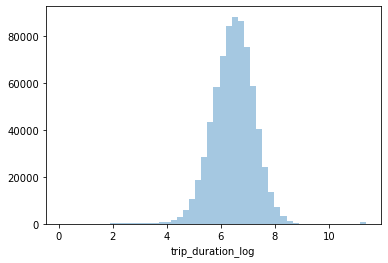

In [17]:
# after log transform of trip duration in seconds

data['trip_duration_log'] = np.log(data['trip_duration'].values + 0.1)
sns.distplot(data['trip_duration_log'], kde = False)
plt.show()

In [18]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,store_and_fwd_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,trip_duration_in_hour,trip_duration_log
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,29,16,0,29,16,0,0.111111,5.991715
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0,11,23,4,11,23,4,0.305556,7.003156
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0,21,17,6,21,18,6,0.454167,7.399459
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0,5,9,1,5,10,1,0.316944,7.039748
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0,17,6,2,17,6,2,0.235556,6.742999


In [19]:
new_data = data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag', 'trip_duration', 'trip_duration_in_hour', 
                      'pickup_latitude', 'dropoff_latitude','pickup_longitude', 'dropoff_longitude'], axis =1)
new_data.head()

,vendor_id,passenger_count,store_and_fwd_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,trip_duration_log
0,2,1,0,29,16,0,29,16,0,5.991715
1,1,2,0,11,23,4,11,23,4,7.003156
2,2,2,0,21,17,6,21,18,6,7.399459
3,2,6,0,5,9,1,5,10,1,7.039748
4,1,1,0,17,6,2,17,6,2,6.742999


In [20]:
x = new_data.drop(['trip_duration_log'], axis = 1)
y = new_data['trip_duration_log']
x.shape, y.shape

((729321, 9), (729321,))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,vendor_id,passenger_count,store_and_fwd_encoded,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,1.0,0.111111,0.0,0.933333,0.695652,0.000000,0.933333,0.695652,0.000000
1,0.0,0.222222,0.0,0.333333,1.000000,0.666667,0.333333,1.000000,0.666667
2,1.0,0.222222,0.0,0.666667,0.739130,1.000000,0.666667,0.782609,1.000000
3,1.0,0.666667,0.0,0.133333,0.391304,0.166667,0.133333,0.434783,0.166667
4,0.0,0.111111,0.0,0.533333,0.260870,0.333333,0.533333,0.260870,0.333333


In [23]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, random_state = 56, test_size = 0.25)

# Linear Model with Regularisation

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)
train_score

0.003398284369799276

In [26]:
test_score = lr.score(x_test, y_test)
test_score

0.003244573307750409

In [27]:
from sklearn.linear_model import Ridge

In [28]:
model2 = Ridge()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test) 
pred2[:10], model2.score(x_test, y_test)

(array([6.34949024, 6.55075472, 6.38385523, 6.45489451, 6.46280967,
        6.47422018, 6.43436142, 6.5206381 , 6.41469209, 6.46801079]),
 0.0032447384668686796)

In [29]:
#print(reg_test)

# Random forest model


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
reg = RandomForestRegressor(random_state = 56)
reg.fit(x_train, y_train)
pred3 = reg.predict(x_test)
rf_test = reg.score(x_test, y_test)

In [32]:
print(rf_test)

0.12429749729674644


In [33]:
reg.score(x_train, y_train)

0.2774606374782763

# Gradient boosting model

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
GBR = GradientBoostingRegressor(random_state = 96)

In [36]:
GBR.fit(x_train, y_train)
pred4 = GBR.predict(x_test)
GBR_test = GBR.score(x_test, y_test)

In [37]:
GBR.score(x_train, y_train)

0.128004619152831

In [38]:
print(GBR_test)

0.12907193883472612


# Averaging

In [39]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mean([ pred2[i], pred3[i], pred4[i]]))

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, final_pred)

0.13360356649820837

In [42]:
#r2_score(y_test, pred1),
r2_score(y_test, pred2), r2_score(y_test, pred3), r2_score(y_test, pred4)

(0.0032447384668686796, 0.12429749729674644, 0.12907193883472612)